<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


In [4]:
t1.std()**2

1.6666666666666665

![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [5]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [6]:
# TODO - during class, but please help!
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

import numpy as np
import pandas as pd

df = pd.DataFrame(survey_data)
df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


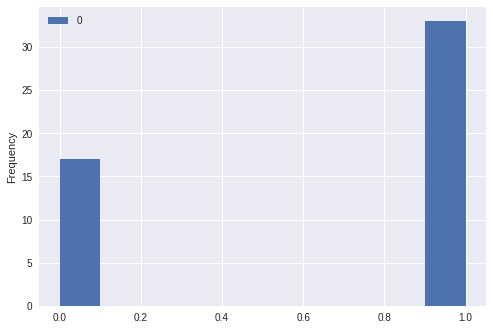

In [7]:
df.plot.hist()

In [8]:
# Now with confidence!

import scipy
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [9]:
# the t-statistic is the ratio of the departure of the estimated value of  a
# parameter from its hypothesized value to its standard error

# We want to calculate: tstat = 2.364321853156195

sample_stderr = 0.478518 / np.sqrt(len(survey_data))
sample_mean = 0.660000
null_hypothesis_mean = 0.5

t_stat = (sample_mean - null_hypothesis_mean) / sample_stderr
print(t_stat)

2.364322449518046


In [10]:
len(survey_data)

50

In [0]:
# Science! Reproducibility...
import random

def make_soda_data(n=50):
  # Fair version
  # return pd.DataFrame([random.randint(0, 1) for _ in range(n)])
  # Unfair version!
  return pd.DataFrame(np.random.binomial(n=1, p=0.5, size=n))

In [0]:
make_soda_data(n=500).describe()

In [0]:
t_statistics = []
p_values = []
n_experiments = 10  # Number of visitors

for _ in range(n_experiments):   
  df = make_soda_data(n=500000)
  ttest = scipy.stats.ttest_1samp(df, 0.5)
  t_statistics.append(ttest.statistic)
  p_values.append(ttest.pvalue)

pd.DataFrame(t_statistics).describe()

In [0]:
pd.DataFrame(p_values).describe()

In [0]:
random.choice([0, 1, 1])  # Unfair coins

In [0]:
np.random.binomial(100, 0.7)

In [0]:
np.random.binomial(1, 0.6)

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

7. Attribute Information:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)

In [0]:
# TODO - your code here!
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None)
df.columns = ['party', 'infants', 'water', 'adoption', 'physician', 'el-salvador',
               'religious', 'satellite', 'nicaragua', 'missile', 'immigration',
                'corporation', 'education', 'superfund', 'crime', 'duty-free', 'south-africa']
df.head(20)

In [24]:
df.party.value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
df2 = df.replace('?', np.nan).copy()
print(df.isnull().sum().sum())
df2.head(20)

In [0]:
#On which issues congressmen preferred not to vote:
print(df2[df2.party=='republican'].isnull().sum()/len(df2[df2.party=='republican'])*100)
print(df2[df2.party=='democrat'].isnull().sum()/len(df2[df2.party=='democrat'])*100)
#from the data below one can see that roughly 10% congressment from both parties 
# did not vote on on'water-project-cost-sharing'issue and 13% of republicans and 
#30% of democrats did not vote on 'export-administration-act-south-africa' issue

In [0]:
df3 = df2.drop(['water', 'south-africa'], axis=1).copy()
df3.head()

In [0]:
# For better data analysis and plotting I'll replace 'y' values with 1 and 'n' values with 0
df3.replace({'y': 1, 'n': 0}, inplace = True)
df3.head(20)

In [134]:
df4 = df3.fillna(0.5)
df4.head()

,party,infants,adoption,physician,el-salvador,religious,satellite,nicaragua,missile,immigration,corporation,education,superfund,crime,duty-free
0,republican,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0
1,republican,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,democrat,0.5,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,democrat,0.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,democrat,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0


In [135]:
df4.isnull().sum().sum()

0

In [0]:
df4.infants.hist()

In [0]:
df_cross_inf = pd.crosstab(df4['party'], df4['infants'], normalize=True)
df_cross_inf

In [0]:
df_cross_inf.plot.bar();

In [0]:
def create_plot_crosstabs(df):
  for column in df.columns:
    df_cross = pd.crosstab(df['party'], column, normalize=True)
    df_cross.plot.bar();

create_plot_crosstabs(df4)    

In [192]:
inf_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].infants, 0.5).pvalue
inf_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].infants, 0.5).pvalue
inf_pvalue_diff = inf_ttest_dem_pvalue - inf_ttest_rep_pvalue
print(inf_ttest_dem_pvalue)
print(inf_ttest_rep_pvalue)
inf_pvalue_diff

0.0007020787391745352
3.1600971356609456e-19


0.0007020787391745349

In [193]:
ad_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].adoption, 0.5).pvalue
ad_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].adoption, 0.5).pvalue
ad_pvalue_diff = ad_ttest_dem_pvalue - ad_ttest_rep_pvalue
print(ad_ttest_dem_pvalue)
print(ad_ttest_rep_pvalue)
ad_pvalue_diff


4.119903926520872e-53
1.2928239686728767e-28


-1.2928239686728767e-28

In [194]:
ph_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].physician, 0.5).pvalue
ph_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].physician, 0.5).pvalue
ph_pvalue_diff = ph_ttest_dem_pvalue - ph_ttest_rep_pvalue
print(ph_ttest_dem_pvalue)
print(ph_ttest_rep_pvalue)
ph_pvalue_diff

2.768081946704667e-87
4.2285554236275644e-101


2.7680819467046247e-87

In [195]:
el_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat']['el-salvador'], 0.5).pvalue
el_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican']['el-salvador'], 0.5).pvalue
el_pvalue_diff = el_ttest_dem_pvalue - el_ttest_rep_pvalue
print(el_ttest_dem_pvalue)
print(el_ttest_rep_pvalue)
el_pvalue_diff

4.050958587413322e-23
2.0399242521294114e-60


4.050958587413322e-23

In [196]:
rel_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].religious, 0.5).pvalue
rel_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].religious, 0.5).pvalue
rel_pvalue_diff = rel_ttest_dem_pvalue - rel_ttest_rep_pvalue
print(rel_ttest_dem_pvalue)
print(rel_ttest_rep_pvalue)
rel_pvalue_diff

0.45604420174869686
2.202655643628261e-37


0.45604420174869686

In [197]:
sat_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].satellite, 0.5).pvalue
sat_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].satellite, 0.5).pvalue
sat_pvalue_diff = sat_ttest_dem_pvalue - sat_ttest_rep_pvalue
print(sat_ttest_dem_pvalue)
print(sat_ttest_rep_pvalue)
sat_pvalue_diff

2.3812691114050773e-21
1.5600418761724162e-12


-1.560041873791147e-12

In [198]:
nic_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].nicaragua, 0.5).pvalue
nic_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].nicaragua, 0.5).pvalue
nic_pvalue_diff = nic_ttest_dem_pvalue - nic_ttest_rep_pvalue
print(nic_ttest_dem_pvalue)
print(nic_ttest_rep_pvalue)
nic_pvalue_diff

6.1110358969932e-34
1.781573571734755e-23


-1.7815735716736446e-23

In [206]:
mis_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].missile, 0.5).pvalue
mis_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].missile, 0.5).pvalue
mis_pvalue_diff = mis_ttest_dem_pvalue - mis_ttest_rep_pvalue
print(mis_ttest_dem_pvalue)
print(mis_ttest_rep_pvalue)
mis_pvalue_diff

3.69913592709327e-18
1.9344524594719517e-33


3.699135927093268e-18

In [207]:
im_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].immigration, 0.5).pvalue
im_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].immigration, 0.5).pvalue
im_pvalue_diff = im_ttest_dem_pvalue - im_ttest_rep_pvalue
print(im_ttest_dem_pvalue)
print(im_ttest_rep_pvalue)

im_pvalue_diff

0.3559660440887368
0.13957810611844593


0.21638793797029085

In [201]:
cor_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].corporation, 0.5).pvalue
cor_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].corporation, 0.5).pvalue
cor_pvalue_diff = cor_ttest_dem_pvalue - cor_ttest_rep_pvalue
print(cor_ttest_dem_pvalue)
print(cor_ttest_rep_pvalue)
cor_pvalue_diff

0.851389996471544
7.604563420239975e-28


0.851389996471544

In [202]:
ed_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].education, 0.5).pvalue
ed_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].education, 0.5).pvalue
ed_pvalue_diff = ed_ttest_dem_pvalue - ed_ttest_rep_pvalue
print(ed_ttest_dem_pvalue)
print(ed_ttest_rep_pvalue)
ed_pvalue_diff

1.108673997197652e-38
1.6714009056692074e-27


-1.6714009056581208e-27

In [203]:
sup_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].superfund, 0.5).pvalue
sup_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].superfund, 0.5).pvalue
sup_pvalue_diff = sup_ttest_dem_pvalue - sup_ttest_rep_pvalue
print(sup_ttest_dem_pvalue)
print(sup_ttest_rep_pvalue)
sup_pvalue_diff

3.2826667782514405e-12
3.5707304341780477e-26


3.282666778251405e-12

In [204]:
cr_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat'].crime, 0.5).pvalue
cr_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican'].crime, 0.5).pvalue
cr_pvalue_diff = cr_ttest_dem_pvalue - cr_ttest_rep_pvalue
print(cr_ttest_dem_pvalue)
print(cr_ttest_rep_pvalue)
cr_pvalue_diff

9.668863754086185e-07
2.2317442645067957e-81


9.668863754086185e-07

In [205]:
df_ttest_dem_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'democrat']['duty-free'], 0.5).pvalue
df_ttest_rep_pvalue = scipy.stats.ttest_1samp(df4[df4.party == 'republican']['duty-free'], 0.5).pvalue
df_pvalue_diff = df_ttest_dem_pvalue - df_ttest_rep_pvalue
print(df_ttest_dem_pvalue)
print(df_ttest_rep_pvalue)
df_pvalue_diff

9.721757258926767e-06
2.0288951092375116e-37


9.721757258926767e-06

7. Attribute Information:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)


The  issues, that republicans support more than democrats with p < 0.01 are:

- anti-satellite-test-ban
- adoption-of-the-budget-resolution
-  aid-to-nicaraguan-contras


The  issues, that democrats support more than republicans with p < 0.01 are:
- handicapped-infants
- crime
- physycian-fee-freeze
- superfund-right-to-sue
- el-salvador-aid
- mx-missile
- duty-free

The issue where the difference between republicans and democrats has p > 0.1 are:

- Democrats support more than Republicans the issue of immigration with p difference ~ 0.21
- Democrats support more than Republicans the issue of synfuels-corporation-cutback with p difference ~ 0.85

